# Step 2: Data Cleaning and PreparationƯ

## 1. What is the meaning of each column?

1) p_id: product id
2) p_name: product name
3) p_id_shop: shop id that sells the product
4) p_shop_name: shop name that sells the product
5) p_brand : brand of the product
6) p_category: category of the product
7) p_sold_quantity: number of products sold
8) p_original_price: original price of the product
9) p_current_price: current price of the product
10) p_discount_rate : discount rate of the product

#### Importing libraries needed for this step


In [52]:
import numpy as np
import pandas as pd

#### Reading the data 

In [53]:
tiki_data = pd.read_csv('../../../data/raw/products_detail.csv')   
tiki_data.head()

,p_id,p_name,p_id_shop,p_shop_name,p_brand,p_categories,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
0,118966833,Móc Treo Cây Lau Nhà Dán Tường Đa Năng Chịu L...,96639.0,Parroti Store,Parroti,"Giá, móc, cây treo",3769,42000,23900,43
1,83412126,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,1.0,Tiki Trading,Lock&Lock,Bình giữ nhiệt,12430,528000,265000,50
2,99868980,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,1.0,Tiki Trading,Lock&Lock,Bình giữ nhiệt,9567,473000,243000,49
3,73124602,Bình Giữ Nhiệt Bằng Thép Không Gỉ Lock&Lock Va...,1.0,Tiki Trading,Lock&Lock,Nhà Cửa - Đời Sống,34920,677000,339000,50
4,53583472,Bộ Hộp Cơm Giữ Nhiệt Lock&Lock Easy Carry 2L L...,1.0,Tiki Trading,Lock&Lock,Nhà Cửa - Đời Sống,9501,1667000,834000,50


#### Understanding the data 

In [54]:
tiki_data.shape

(1974, 10)

In [55]:
tiki_data.describe()

,p_id,p_id_shop,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
count,1.974000e+03,1966.000000,1974.000000,1.974000e+03,1.974000e+03,1974.000000
mean,1.034886e+08,109168.089013,720.616515,2.726703e+05,2.084191e+05,14.721378
std,6.117190e+07,93967.561518,2068.596611,4.533643e+05,3.246342e+05,18.831565
min,3.728490e+05,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.385458e+07,17480.000000,31.000000,5.800000e+04,5.000000e+04,0.000000
50%,1.046812e+08,97441.000000,151.000000,1.390000e+05,1.190000e+05,0.000000
75%,1.603094e+08,180001.500000,589.750000,3.087500e+05,2.477500e+05,32.000000
max,2.052945e+08,310760.000000,36742.000000,5.800000e+06,4.207000e+06,72.000000


## 2. What is the current data type of each column? Are there columns having inappropriate data types?

In [56]:
tiki_data.dtypes

p_id                  int64
p_name               object
p_id_shop           float64
p_shop_name          object
p_brand              object
p_categories         object
p_sold_quantity       int64
p_original_price      int64
p_current_price       int64
p_discount_rate       int64
dtype: object

There are 4 columns with the datatype of `object`: "p_name", "p_category", "p_shop_name", "p_branch". In Pandas, `object` types usually refer to strings. And this is not an exception in this case. 

In [57]:
def open_object_dtype(s):
    dtypes = set(s.apply(type))
    return dtypes

In [58]:
print(open_object_dtype(tiki_data['p_name']))
print(open_object_dtype(tiki_data['p_categories']))
print(open_object_dtype(tiki_data['p_shop_name']))
print(open_object_dtype(tiki_data['p_brand']))

{<class 'str'>}
{<class 'str'>, <class 'float'>}
{<class 'str'>, <class 'float'>}
{<class 'str'>}


In [59]:
tiki_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   p_id              1974 non-null   int64  
 1   p_name            1974 non-null   object 
 2   p_id_shop         1966 non-null   float64
 3   p_shop_name       1966 non-null   object 
 4   p_brand           1974 non-null   object 
 5   p_categories      1966 non-null   object 
 6   p_sold_quantity   1974 non-null   int64  
 7   p_original_price  1974 non-null   int64  
 8   p_current_price   1974 non-null   int64  
 9   p_discount_rate   1974 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 154.3+ KB


In [60]:
# split category from p_categories column 
category = tiki_data['p_categories'].str.split(',', expand=True)
tiki_data.insert(2, 'p_category', category[0])
tiki_data.drop(['p_categories'], axis=1, inplace=True)
tiki_data.head()

,p_id,p_name,p_category,p_id_shop,p_shop_name,p_brand,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
0,118966833,Móc Treo Cây Lau Nhà Dán Tường Đa Năng Chịu L...,Giá,96639.0,Parroti Store,Parroti,3769,42000,23900,43
1,83412126,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,Bình giữ nhiệt,1.0,Tiki Trading,Lock&Lock,12430,528000,265000,50
2,99868980,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,Bình giữ nhiệt,1.0,Tiki Trading,Lock&Lock,9567,473000,243000,49
3,73124602,Bình Giữ Nhiệt Bằng Thép Không Gỉ Lock&Lock Va...,Nhà Cửa - Đời Sống,1.0,Tiki Trading,Lock&Lock,34920,677000,339000,50
4,53583472,Bộ Hộp Cơm Giữ Nhiệt Lock&Lock Easy Carry 2L L...,Nhà Cửa - Đời Sống,1.0,Tiki Trading,Lock&Lock,9501,1667000,834000,50


## 3. With each column, how are values distributed?
-  We will do the following steps: 
1. Fixing invalid values
2. Checking duplicates and removing them 
3. Checking missing values and removing them

#### 1. Fixing invalid values

In [61]:
tiki_data['p_name'].unique()

array(['Móc Treo Cây Lau Nhà Dán Tường Đa Năng  Chịu Lực Tốt - Parroti Keeper KP02',
       'Bình Giữ Nhiệt Lock&Lock Energetic One-Touch Tumbler LHC3249 - 550ML',
       'Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC4269 540ml', ...,
       'Combo 5 cuộn túi đựng rác tự phân hủy nhiều màu',
       'COMBO 03 LÕI THAY THẾ CÂY LĂN BỤI COLOCOLO (CÁN NGẮN VÀ CÁN DÀI)',
       'Đồng hồ nước - Đồng hồ nước sinh hoạt'], dtype=object)

In [ ]:
tiki_data['p_shop_name'].value_counts().plot(kind='line', figsize=(20, 10)) 

In [ ]:
tiki_data['p_category'].unique()

#### As we can see, there are categories named "Root" and "Giá" not mean as a category. 

In [64]:
# count number of category have name 'Root'
print(tiki_data['p_category'].value_counts()['Root'])

# count number of category have name 'Giá'
print(tiki_data['p_category'].value_counts()['Giá'])

166
38


#### The number of categories named "Root" and "Giá" is quite small (166+38/2000), So to avoid data confusion, we will delete it.

In [67]:
# drop row have category name 'Root' or "Giá"
tiki_data = tiki_data[tiki_data['p_category'] != 'Root']
tiki_data = tiki_data[tiki_data['p_category'] != 'Giá']

In [68]:
tiki_data.shape

(1770, 10)

#### As we know, in terms of product price (p_original_price) there is almost no price of 0. So we will check our data has such values.

In [ ]:
count = 0

for x in tiki_data.index:
  if tiki_data.loc[x, "p_original_price"] == 0:
    count += 1
    print(tiki_data.loc[x, :])

count

#### As we can see above, the products have a price(p_original_price) of 0. So we will delete these rows.

In [70]:
# drop row have p_original_price = 0
tiki_data = tiki_data[tiki_data['p_original_price'] != 0]

In [71]:
count = 0

for x in tiki_data.index:
  if tiki_data.loc[x, "p_original_price"] == 0:
    count += 1
    print(tiki_data.loc[x, :])

count

0

### 2. Checking duplicates and removing them

<AxesSubplot:>

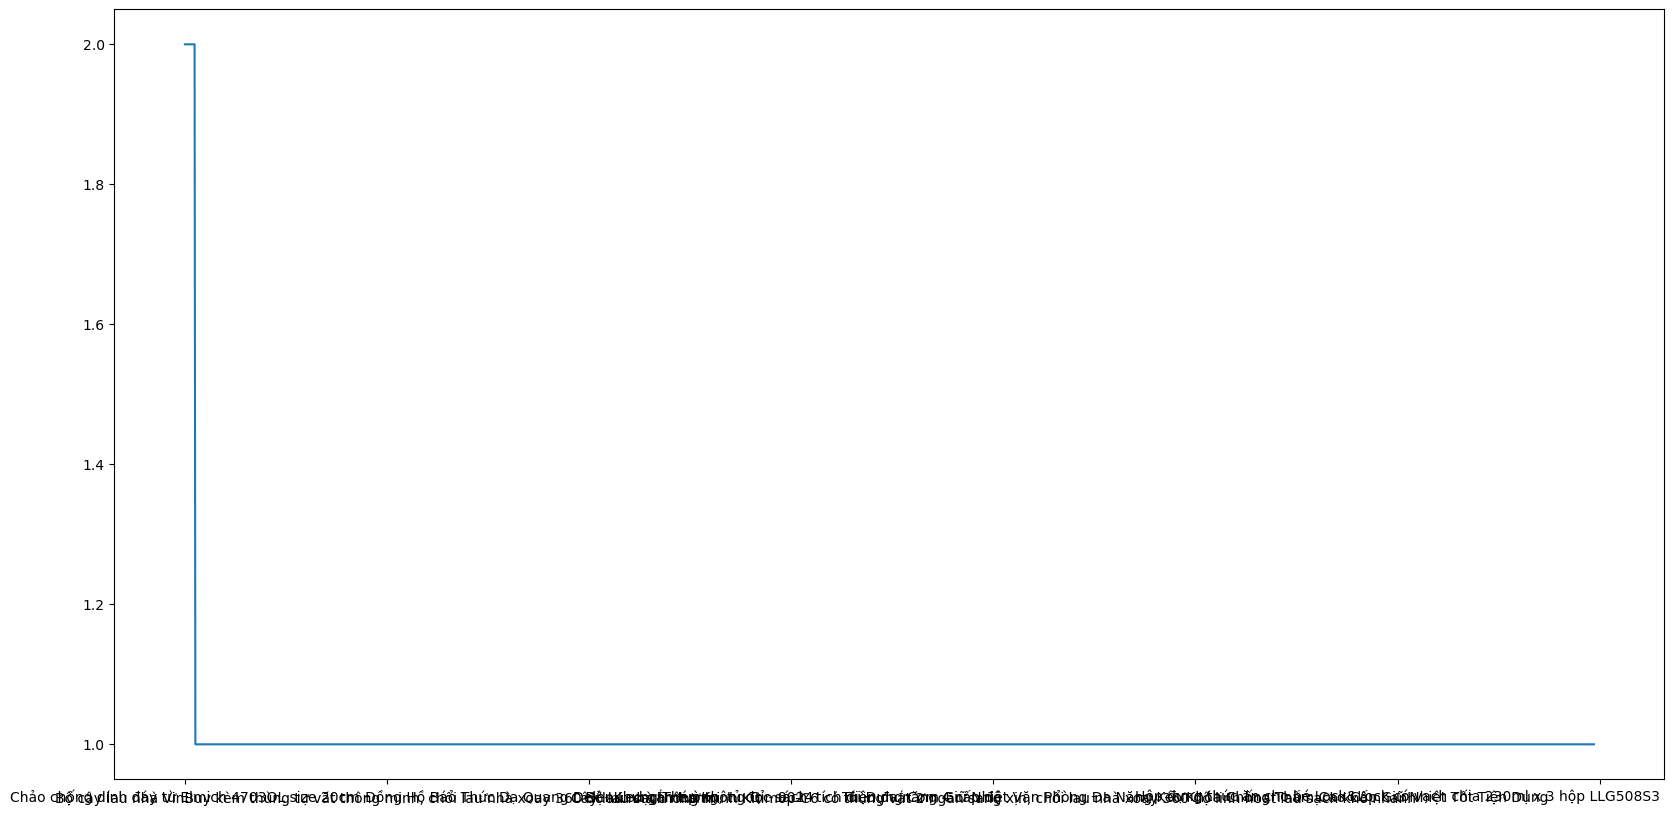

In [72]:
tiki_data['p_name'].value_counts().plot(kind='line', figsize=(20, 10))

#### We see that the number of identical elements of the name column is only 1!!! so keeping it as it is won't mess up the data

### 3. Checking missing values and removing them

In [16]:
tiki_data.isnull().sum()

p_id                0
p_name              0
p_category          0
p_id_shop           0
p_shop_name         0
p_brand             0
p_sold_quantity     0
p_original_price    0
p_current_price     0
p_discount_rate     0
dtype: int64

#### When displaying the above table, because the number of missing values is very small, and the numbers are the same (both are 8). Predict it on the same 8 rows. We will try to delete the missing values of p_id_shop to see if there are still missing values?

In [17]:
tiki_data.dropna(subset=['p_id_shop'], inplace=True)
tiki_data.isnull().sum()


p_id                0
p_name              0
p_category          0
p_id_shop           0
p_shop_name         0
p_brand             0
p_sold_quantity     0
p_original_price    0
p_current_price     0
p_discount_rate     0
dtype: int64

#### As expected, deleting rows where p_id_shop is null also deletes rows where p_shop_name and p_category are null. So the above prediction is correct.

In [73]:
# save data to csv file
tiki_data.to_csv('../../../data/processed/tiki_data.csv', index=False)